# EDA and VISUALIZATION ON GLOBAL SUPERSTORE!

In [9]:
import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\dkuma\\Downloads\\Global-Superstore.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows and basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  float64       
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

(None,
     Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
 0  32298.0   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
 1  26341.0    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
 2  25330.0    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
 3  13524.0  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
 4  47221.0     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   
 
       Customer Name      Segment           City            State  ...  \
 0       Rick Hansen     Consumer  New York City         New York  ...   
 1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
 2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
 3  Katherine Murray  Home Office         Berlin           Berlin  ...   
 4       Rick Hansen     Consumer          Dakar            Dakar  ...   
 
          Product ID    Category Sub-Category  \
 0   TEC-AC-1000

In [10]:
# Summary statistics for numerical columns
summary_stats = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

summary_stats, missing_values


(            Row ID   Postal Code         Sales      Quantity      Discount  \
 count  51290.00000   9994.000000  51290.000000  51290.000000  51290.000000   
 mean   25645.50000  55190.379428    246.490581      3.476545      0.142908   
 std    14806.29199  32063.693350    487.565361      2.278766      0.212280   
 min        1.00000   1040.000000      0.444000      1.000000      0.000000   
 25%    12823.25000  23223.000000     30.758625      2.000000      0.000000   
 50%    25645.50000  56430.500000     85.053000      3.000000      0.000000   
 75%    38467.75000  90008.000000    251.053200      5.000000      0.200000   
 max    51290.00000  99301.000000  22638.480000     14.000000      0.850000   
 
              Profit  Shipping Cost  
 count  51290.000000   51290.000000  
 mean      28.610982      26.375915  
 std      174.340972      57.296804  
 min    -6599.978000       0.000000  
 25%        0.000000       2.610000  
 50%        9.240000       7.790000  
 75%       36.810000 

# Data Distribution

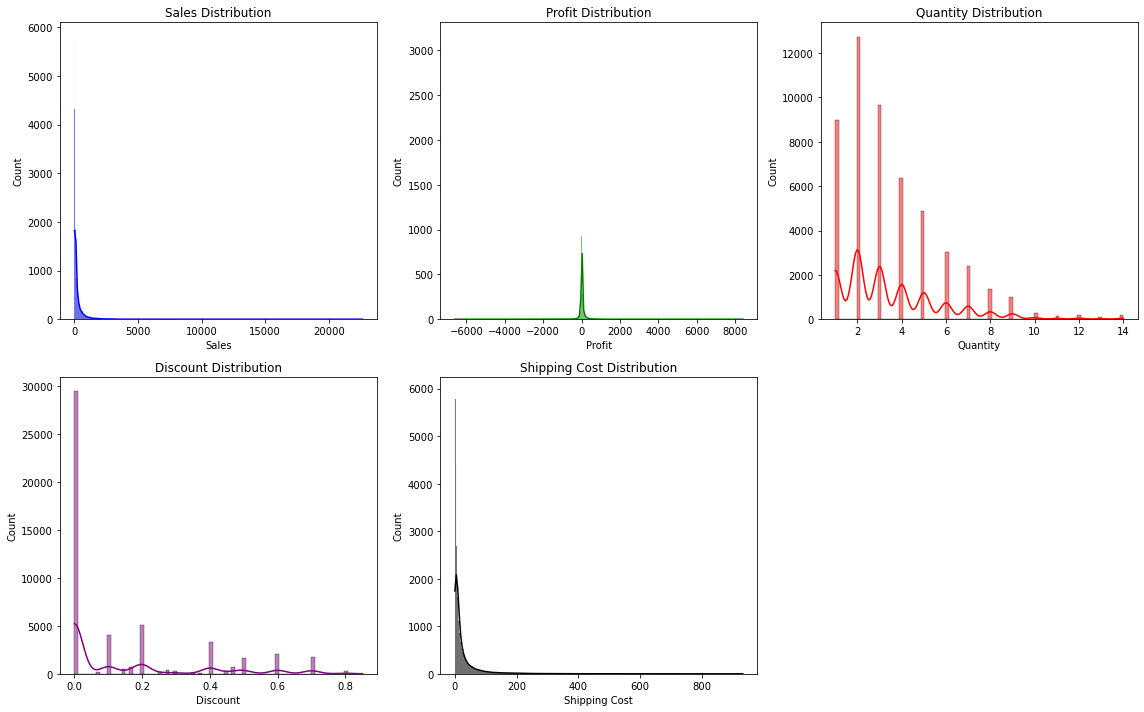

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the matplotlib figure
plt.figure(figsize=(16, 10))

# Distribution of Sales
plt.subplot(2, 3, 1)
sns.histplot(data['Sales'], kde=True, color='blue')
plt.title('Sales Distribution')

# Distribution of Profit
plt.subplot(2, 3, 2)
sns.histplot(data['Profit'], kde=True, color='green')
plt.title('Profit Distribution')

# Distribution of Quantity
plt.subplot(2, 3, 3)
sns.histplot(data['Quantity'], kde=True, color='red')
plt.title('Quantity Distribution')

# Distribution of Discount
plt.subplot(2, 3, 4)
sns.histplot(data['Discount'], kde=True, color='purple')
plt.title('Discount Distribution')

# Distribution of Shipping Cost
plt.subplot(2, 3, 5)
sns.histplot(data['Shipping Cost'], kde=True, color='black')
plt.title('Shipping Cost Distribution')

plt.tight_layout()
plt.show()


# SALES PERFORMANCE BY CATEGORY

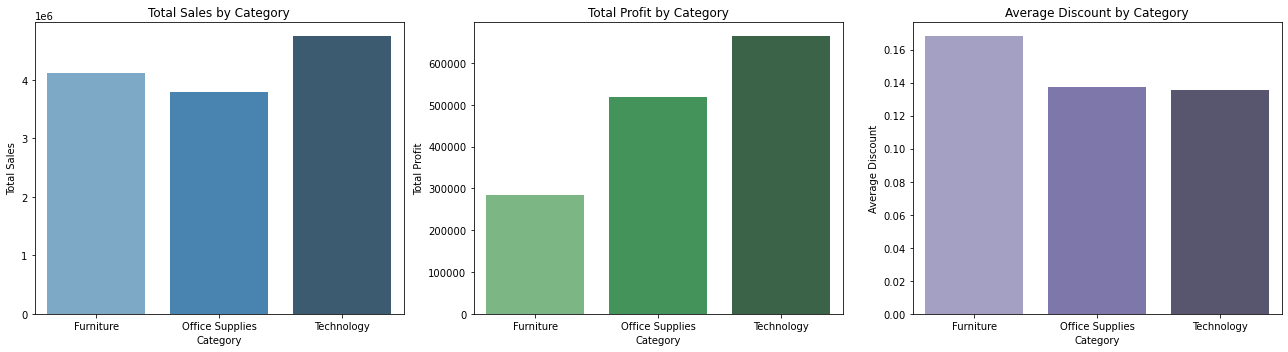

,Category,Sales,Profit,Discount
0,Furniture,4.110874e+06,285204.72380,0.168087
1,Office Supplies,3.787070e+06,518473.83430,0.137409
2,Technology,4.744557e+06,663778.73318,0.135342


In [33]:
# Sales performance by Category
category_performance = data.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()

# Plotting sales performance by Category
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Total Sales by Category
sns.barplot(x='Category', y='Sales', data=category_performance, ax=ax[0], palette='Blues_d')
ax[0].set_title('Total Sales by Category')
ax[0].set_ylabel('Total Sales')

# Total Profit by Category
sns.barplot(x='Category', y='Profit', data=category_performance, ax=ax[1], palette='Greens_d')
ax[1].set_title('Total Profit by Category')
ax[1].set_ylabel('Total Profit')

# Average Discount by Category
sns.barplot(x='Category', y='Discount', data=category_performance, ax=ax[2], palette='Purples_d')
ax[2].set_title('Average Discount by Category')
ax[2].set_ylabel('Average Discount')

plt.tight_layout()
plt.show()

category_performance


# CUSTOMER SEGMENTATION

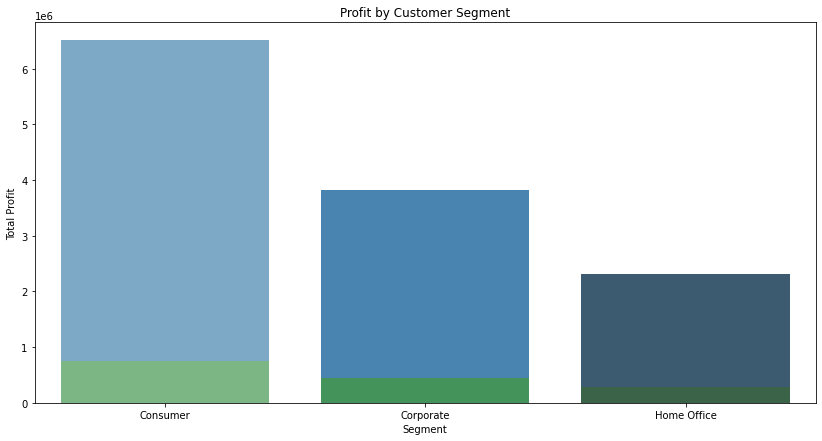

In [34]:
# Plotting Sales and Profit by Customer Segment
plt.figure(figsize=(14, 7))
sns.barplot(x='Segment', y='Sales', data=segment_analysis, palette='Blues_d')
plt.title('Sales by Customer Segment')
plt.ylabel('Total Sales')

sns.barplot(x='Segment', y='Profit', data=segment_analysis, palette='Greens_d')
plt.title('Profit by Customer Segment')
plt.ylabel('Total Profit')

plt.show()


# TIME SERIES ANALYSIS

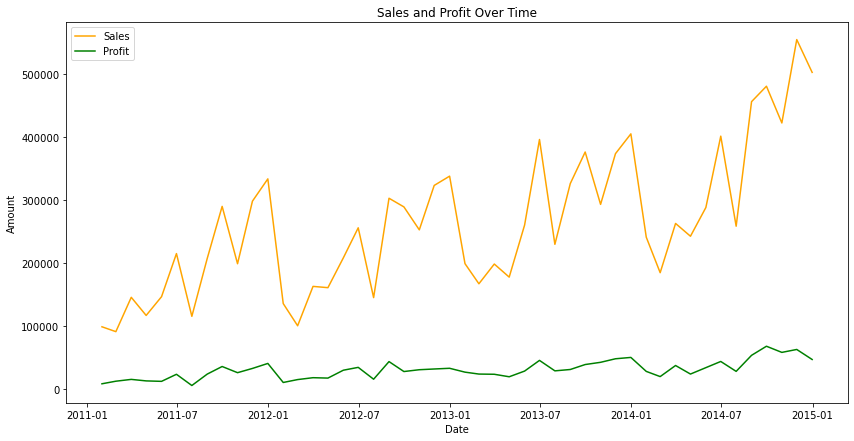

In [15]:
# Converted order date to datetime 
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Aggregated sales and profit by month and year
time_series_data = data.set_index('Order Date').resample('M').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Plotting Sales and Profit Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Order Date', y='Sales', data=time_series_data, label='Sales', color='orange')
sns.lineplot(x='Order Date', y='Profit', data=time_series_data, label='Profit', color='green')
plt.title('Sales and Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()


# TOP PRODUCTS BY SALES & PROFIT

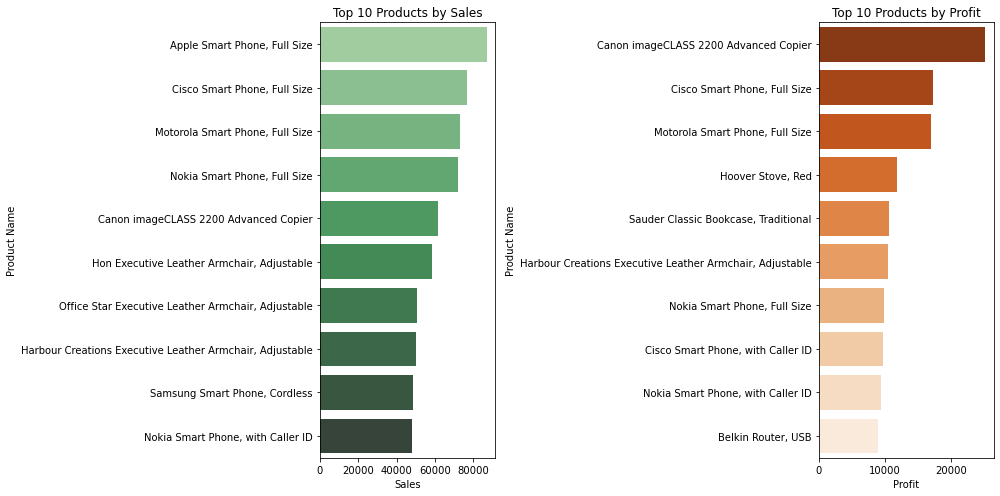

In [27]:
# AggregateD sales and profit by product
top_products = data.groupby('Product Name').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Top 10 products by Sales
top_sales_products = top_products.nlargest(10, 'Sales')

# Top 10 products by Profit
top_profit_products = top_products.nlargest(10, 'Profit')

# Plotting
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Sales', y='Product Name', data=top_sales_products, palette='Greens_d')
plt.title('Top 10 Products by Sales')

plt.subplot(1, 2, 2)
sns.barplot(x='Profit', y='Product Name', data=top_profit_products, palette='Oranges_r')
plt.title('Top 10 Products by Profit')

plt.tight_layout()
plt.show()


# SALES & PROFIT BY REGION

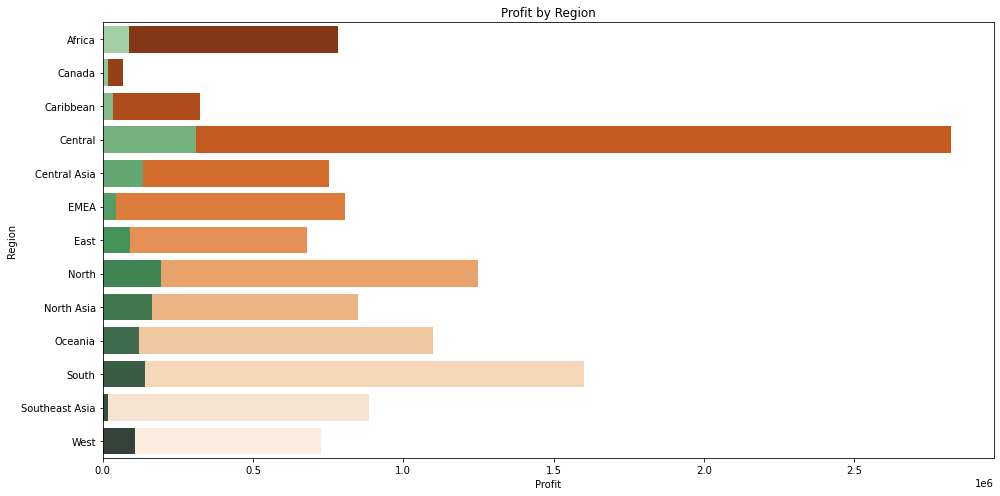

In [31]:
# AggregateD sales and profit by region
region_analysis = data.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='Sales', y='Region', data=region_analysis, palette='Oranges_r')
plt.title('Sales by Region')

sns.barplot(x='Profit', y='Region', data=region_analysis, palette='Greens_d')
plt.title('Profit by Region')

plt.tight_layout()
plt.show()


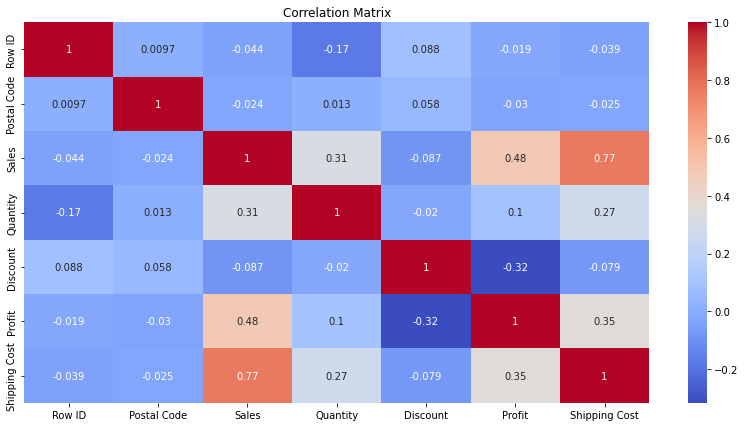

In [32]:
# Plotting Correlation Matrix
plt.figure(figsize=(14, 7))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
